<a href="https://colab.research.google.com/github/mahireddy1318/udemy_pytorch/blob/main/02_PyTorch_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [ ]:
X,y = make_circles(n_samples=1000, noise=0.02, random_state=2)
print(X[:5],y[:5])


[[ 0.86288249  0.48591532]
 [-0.75203741  0.23849579]
 [-0.27819252 -0.73117471]
 [-0.86280955 -0.53567706]
 [ 0.46578282 -0.67069444]] [0 1 1 0 1]


In [ ]:
import pandas as pd

df = pd.DataFrame({'X1':X[:,0],
                   'X2':X[:,1],
                   'y':y})
df
# df1 = pd.DataFrame(data=X ,columns=['X1','X2'])
# df1['y'] = y
# df1

,X1,X2,y
0,0.862882,0.485915,0
1,-0.752037,0.238496,1
2,-0.278193,-0.731175,1
3,-0.862810,-0.535677,0
4,0.465783,-0.670694,1
...,...,...,...
995,0.739638,0.345119,1
996,0.418999,0.716291,1
997,1.016959,-0.068741,0
998,0.759771,0.247733,1


In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
df['y'].value_counts()

0    500
1    500
Name: y, dtype: int64

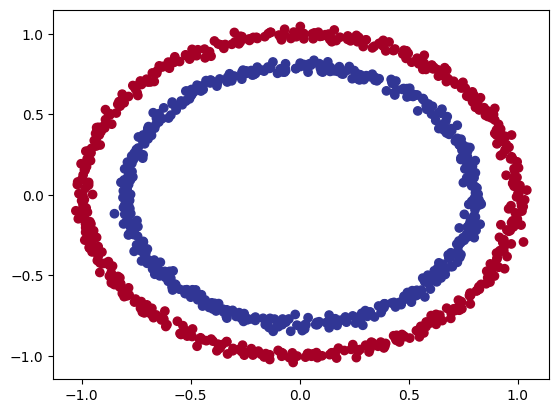

In [ ]:
plt.scatter(x = X[:,0], y=X[:,1], c=y,
            cmap=plt.cm.RdYlBu)

In [ ]:
import torch
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)
X[:5], y[:5]

(tensor([[ 0.8629,  0.4859],
         [-0.7520,  0.2385],
         [-0.2782, -0.7312],
         [-0.8628, -0.5357],
         [ 0.4658, -0.6707]]),
 tensor([0., 1., 1., 0., 1.]))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(f'X_train:{X_train.shape}, X_test:{X_test.shape},y_train:{y_train.shape},y_test:{y_test.shape}')

X_train:torch.Size([800, 2]), X_test:torch.Size([200, 2]),y_train:torch.Size([800]),y_test:torch.Size([200])


#2. Building model

In [ ]:
#Setting up device agnostic code (so our model can run on CPU or GPU if it's available)
import torch
from torch import nn
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [ ]:
#checking avalible GPU Configuration
!nvidia-smi


Sat Oct 21 07:36:57 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   56C    P0    28W /  70W |    855MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
#Constructing a model by subclassing nn.Module
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = nn.Linear(in_features=2, out_features=5)
    self.layer2 = nn.Linear(in_features=5, out_features=1)

  def forward(self, x):
    return self.layer2(self.layer1(x))


In [ ]:
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer1): Linear(in_features=2, out_features=5, bias=True)
  (layer2): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
model_0.state_dict()

OrderedDict([('layer1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188]], device='cuda:0')),
             ('layer1.bias',
              tensor([0.6146, 0.1323, 0.5224, 0.0958, 0.3410], device='cuda:0')),
             ('layer2.weight',
              tensor([[-0.0631,  0.3448,  0.0661, -0.2088,  0.1140]], device='cuda:0')),
             ('layer2.bias', tensor([-0.2060], device='cuda:0'))])

You can also do the same as above using nn.Sequential.

nn.Sequential performs a forward pass computation of the input data through the layers in the order they appear.

In [ ]:
# Replicate CircleModelV0 with nn.Sequential
model_00 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_00

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
# Make predictions with the model
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device)).squeeze()
  print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
  print(f"Length of test samples: {len(y_test)}, Shape: {y_test.shape}")
  print(f"\nFirst 10 predictions:\n{untrained_preds[:10]}")
  print(f"\nFirst 10 test labels:\n{y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200])
Length of test samples: 200, Shape: torch.Size([200])

First 10 predictions:
tensor([-0.0810, -0.1089, -0.1956, -0.1210, -0.1740, -0.1271, -0.1455, -0.1998,
        -0.1029, -0.1657], device='cuda:0')

First 10 test labels:
tensor([0., 1., 0., 0., 1., 1., 1., 0., 1., 1.])


#2.1 Setup loss function and optimizer

In [ ]:
# Create a loss function
# loss_fn = nn.BCELoss() # BCELoss = no sigmoid built-in
loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss = sigmoid built-in

optimizer = torch.optim.SGD(
    params=model_0.parameters(),
    lr=0.1
)


In [ ]:
#Now let's also create an evaluation metric
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  accuracy = (correct / len(y_pred)) * 100
  return accuracy

#3. Train model

In [ ]:
# View the frist 5 outputs of the forward pass on the test data
y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.0810],
        [-0.1089],
        [-0.1956],
        [-0.1210],
        [-0.1740]], device='cuda:0', grad_fn=<SliceBackward0>)

In [ ]:
# Use sigmoid on model logits
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs, y_logits

(tensor([[0.4798],
         [0.4728],
         [0.4512],
         [0.4698],
         [0.4566]], device='cuda:0', grad_fn=<SigmoidBackward0>),
 tensor([[-0.0810],
         [-0.1089],
         [-0.1956],
         [-0.1210],
         [-0.1740]], device='cuda:0', grad_fn=<SliceBackward0>))

<b>BCE Loss :</b>BCELoss() expects your output to be probabilities, that is with the sigmoid activation.<br>
<b>BCEWithLogitsLoss():</b>BCEWithLogitsLoss() expects your output to be logits, that is without the sigmoid activation.<br>
<br>
If prob >= 0.5 output is 1, prob < 0.5 output is 0.


In [ ]:
# Find the predicted labels (round the prediction probabilities)
y_preds = torch.round(y_pred_probs)

# In full
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))
#print(y_pred_labels)
# Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


tensor([0., 0., 0., 0., 0.], device='cuda:0', grad_fn=<SqueezeBackward0>)

In [ ]:
y_test[:5]

tensor([0., 1., 0., 0., 1.])

#3.2 Building a training and testing loop

In [ ]:
torch.manual_seed(42)

# Set the number of epochs
epochs = 100

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build training and evaluation loop
for epoch in range(epochs):
    ### Training
    model_0.train()

    # 1. Forward pass (model outputs raw logits)
    y_logits = model_0(X_train).squeeze() # squeeze to remove extra `1` dimensions, this won't work unless model and data are on same device
    y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> pred labls

    # 2. Calculate loss/accuracy
    # loss = loss_fn(torch.sigmoid(y_logits), # Using nn.BCELoss you need torch.sigmoid()
    #                y_train)
    loss = loss_fn(y_logits, # Using nn.BCEWithLogitsLoss works with raw logits
                   y_train)
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_0.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        # 2. Caculate loss/accuracy
        test_loss = loss_fn(test_logits,
                            y_test)
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)

    # Print out what's happening every 10 epochs
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69572, Accuracy: 50.12% | Test loss: 0.69696, Test acc: 49.50%
Epoch: 10 | Loss: 0.69424, Accuracy: 50.12% | Test loss: 0.69557, Test acc: 49.50%
Epoch: 20 | Loss: 0.69368, Accuracy: 44.88% | Test loss: 0.69506, Test acc: 46.50%
Epoch: 30 | Loss: 0.69344, Accuracy: 47.62% | Test loss: 0.69488, Test acc: 46.50%
Epoch: 40 | Loss: 0.69333, Accuracy: 48.75% | Test loss: 0.69483, Test acc: 48.00%
Epoch: 50 | Loss: 0.69326, Accuracy: 48.62% | Test loss: 0.69482, Test acc: 49.50%
Epoch: 60 | Loss: 0.69321, Accuracy: 48.38% | Test loss: 0.69483, Test acc: 50.00%
Epoch: 70 | Loss: 0.69317, Accuracy: 48.50% | Test loss: 0.69485, Test acc: 50.00%
Epoch: 80 | Loss: 0.69314, Accuracy: 49.25% | Test loss: 0.69487, Test acc: 49.50%
Epoch: 90 | Loss: 0.69311, Accuracy: 49.00% | Test loss: 0.69489, Test acc: 49.00%


##4. Make predictions and evaluate the model

In [ ]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download


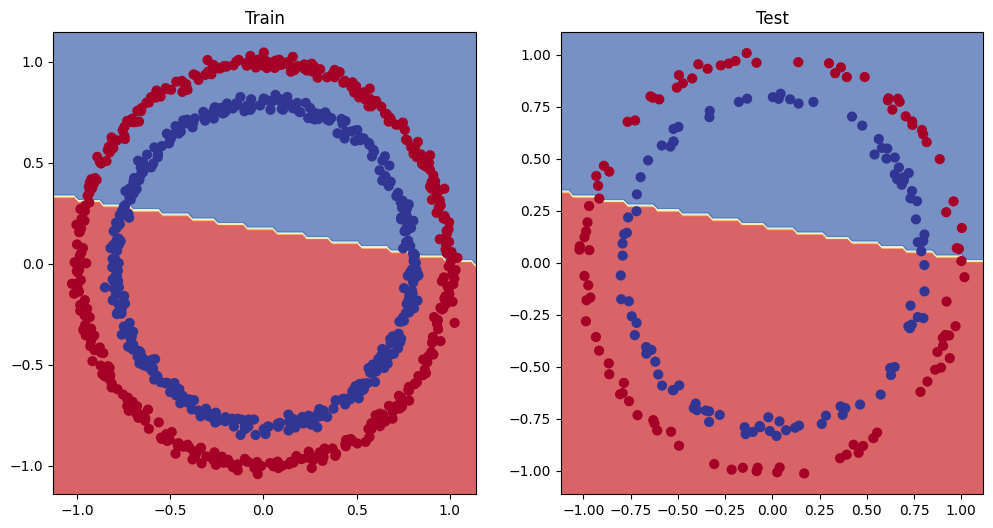

In [ ]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

#5. Improving a model (from a model perspective)

Let's see what happens if we add an extra layer to our model, fit for longer (epochs=1000 instead of epochs=100) and increase the number of hidden units from 5 to 10.

We'll follow the same steps we did above but with a few changed hyperparameters.

In [ ]:
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10) # extra layer
        self.layer_3 = nn.Linear(in_features=10, out_features=1)

    def forward(self, x): # note: always make sure forward is spelt correctly!
        # Creating a model like this is the same as below, though below
        # generally benefits from speedups where possible.
        # z = self.layer_1(x)
        # z = self.layer_2(z)
        # z = self.layer_3(z)
        # return z
        return self.layer_3(self.layer_2(self.layer_1(x)))

model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
# loss_fn = nn.BCELoss() # Requires sigmoid on input
loss_fn = nn.BCEWithLogitsLoss() # Does not require sigmoid on input
optimizer = torch.optim.SGD(model_1.parameters(), lr=0.1)

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
epochs = 1000 # Train for longer

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    ### Training
    # 1. Forward pass
    y_logits = model_1(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> predicition probabilities -> prediction labels

    # 2. Calculate loss/accuracy
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_1.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_1(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        # 2. Caculate loss/accuracy
        test_loss = loss_fn(test_logits,
                            y_test)
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)

    # Print out what's happening every 10 epochs
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.69335, Accuracy: 50.62% | Test loss: 0.69527, Test acc: 50.50%
Epoch: 100 | Loss: 0.69297, Accuracy: 50.75% | Test loss: 0.69495, Test acc: 44.50%
Epoch: 200 | Loss: 0.69294, Accuracy: 51.62% | Test loss: 0.69501, Test acc: 42.50%
Epoch: 300 | Loss: 0.69294, Accuracy: 51.38% | Test loss: 0.69506, Test acc: 42.50%
Epoch: 400 | Loss: 0.69294, Accuracy: 51.50% | Test loss: 0.69508, Test acc: 42.00%
Epoch: 500 | Loss: 0.69294, Accuracy: 51.62% | Test loss: 0.69509, Test acc: 42.50%
Epoch: 600 | Loss: 0.69294, Accuracy: 51.62% | Test loss: 0.69509, Test acc: 42.50%
Epoch: 700 | Loss: 0.69294, Accuracy: 51.50% | Test loss: 0.69509, Test acc: 42.50%
Epoch: 800 | Loss: 0.69294, Accuracy: 51.50% | Test loss: 0.69509, Test acc: 42.50%
Epoch: 900 | Loss: 0.69294, Accuracy: 51.50% | Test loss: 0.69509, Test acc: 42.50%


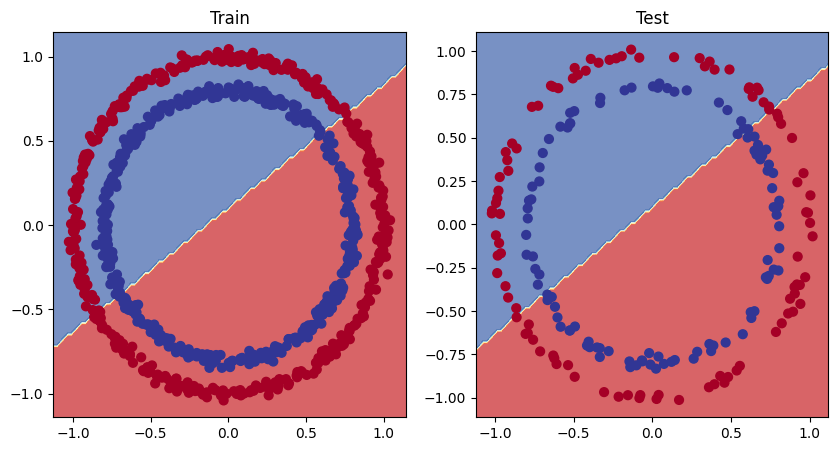

In [ ]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

#5.1 Preparing data to see if our model can model a straight line

In [ ]:
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01
X_regression = torch.arange(start=start, end=end, step=step).unsqueeze(dim=1)
print(len(X_regression))
y_regression = X_regression * weight + bias
print(len(y_regression))
X_regression[:5], y_regression[:5]

100
100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [ ]:
train_split = int(len(X_regression) * 0.8)
X_train =  X_regression[:train_split]
X_test = X_regression[train_split:]
y_train = y_regression[:train_split]
y_test = y_regression[train_split:]
print(f'X_train:{len(X_train)}')
print(f'X_test:{len(X_test)}')
print(f'y_train:{len(y_train)}')
print(f'y_test:{len(y_test)}')

X_train:80
X_test:20
y_train:80
y_test:20


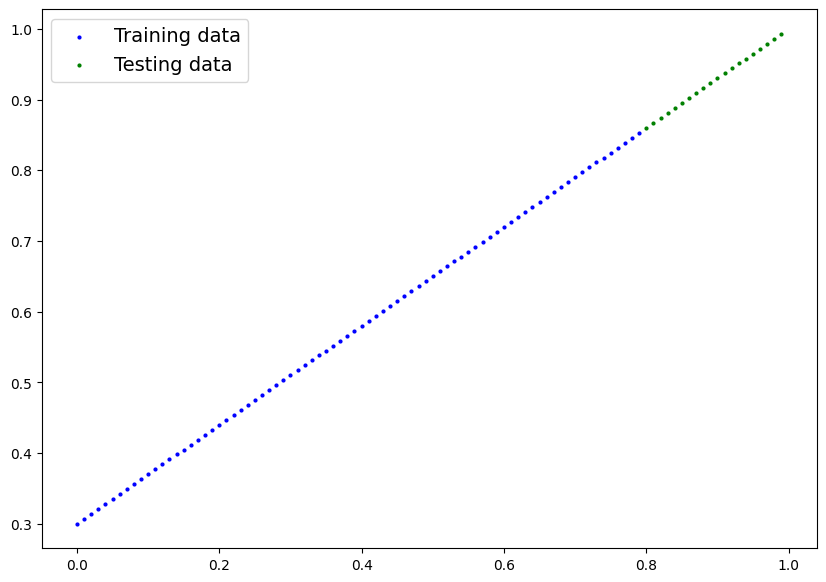

In [ ]:
plot_predictions(train_data=X_train,
    train_labels=y_train,
    test_data=X_test,
    test_labels=y_test
)

#5.2 Adjusting model_1 to fit a straight line

In [ ]:
# Same architecture as model_1 (but using nn.Sequential)
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
# Loss and optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(model_2.parameters(), lr=0.1)

In [ ]:
# Train the model
torch.manual_seed(42)

# Set the number of epochs
epochs = 1000

# Put data to target device
X_train_regression, y_train_regression = X_train.to(device), y_train.to(device)
X_test_regression, y_test_regression = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    ### Training
    # 1. Forward pass
    y_pred = model_2(X_train_regression)

    # 2. Calculate loss (no accuracy since it's a regression problem, not classification)
    loss = loss_fn(y_pred, y_train_regression)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_2.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_pred = model_2(X_test_regression)
      # 2. Calculate the loss
      test_loss = loss_fn(test_pred, y_test_regression)

    # Print out what's happening
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Train loss: {loss:.5f}, Test loss: {test_loss:.5f}")

Epoch: 0 | Train loss: 0.75986, Test loss: 0.54143
Epoch: 100 | Train loss: 0.09309, Test loss: 0.02901
Epoch: 200 | Train loss: 0.07376, Test loss: 0.02850
Epoch: 300 | Train loss: 0.06745, Test loss: 0.00615
Epoch: 400 | Train loss: 0.06107, Test loss: 0.02004
Epoch: 500 | Train loss: 0.05698, Test loss: 0.01061
Epoch: 600 | Train loss: 0.04857, Test loss: 0.01326
Epoch: 700 | Train loss: 0.06109, Test loss: 0.02127
Epoch: 800 | Train loss: 0.05599, Test loss: 0.01426
Epoch: 900 | Train loss: 0.05571, Test loss: 0.00603


Let's plot its predictions to see if that's so.

And remember, since our model and data are using the target device, and this device may be a GPU, however, our plotting function uses matplotlib and matplotlib can't handle data on the GPU.

To handle that, we'll send all of our data to the CPU using .cpu() when we pass it to plot_predictions().

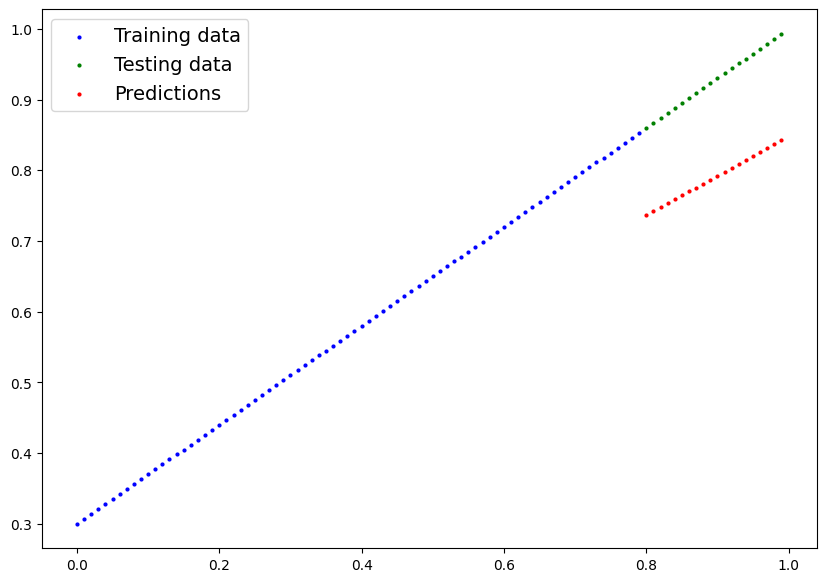

In [ ]:
# Turn on evaluation mode
model_2.eval()

# Make predictions (inference)
with torch.inference_mode():
    y_preds = model_2(X_test_regression)

# Plot data and predictions with data on the CPU (matplotlib can't handle data on the GPU)
# (try removing .cpu() from one of the below and see what happens)
plot_predictions(train_data=X_train.cpu(),
                 train_labels=y_train.cpu(),
                 test_data=X_test.cpu(),
                 test_labels=y_test.cpu(),
                 predictions=y_preds.cpu())


#6. The missing piece: non-linearity
We've seen our model can draw straight (linear) lines, thanks to its linear layers.

But how about we give it the capacity to draw non-straight (non-linear) lines?

How?

Let's find out.

#6.1 Recreating non-linear data (red and blue circles)
First, let's recreate the data to start off fresh. We'll use the same setup as before.

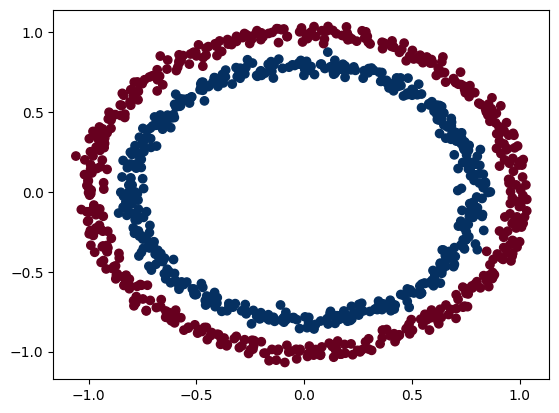

In [ ]:
# Make and plot data
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples=1000,
    noise=0.03,
    random_state=42,
)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu);

In [ ]:
# Convert to tensors and split into train and test sets
import torch
from sklearn.model_selection import train_test_split

# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42
)

X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

#6.2 Building a model with non-linearity
Now here comes the fun part.

What kind of pattern do you think you could draw with unlimited straight (linear) and non-straight (non-linear) lines?

So far our neural networks have only been using linear (straight) line functions.

But the data we've been working with is non-linear (circles).

What do you think will happen when we introduce the capability for our model to use non-linear actviation functions?

Well let's see.

PyTorch has a bunch of ready-made non-linear activation functions that do similiar but different things.

One of the most common and best performing is ReLU (rectified linear-unit, torch.nn.ReLU()).

In [ ]:
# Build model with non-linear activation function
from torch import nn
class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU() # <- add in ReLU activation function
        # Can also put sigmoid in the model
        # This would mean you don't need to use it on the predictions
        # self.sigmoid = nn.Sigmoid()

    def forward(self, x):
      # Intersperse the ReLU activation function between layers
       return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2().to(device)
print(model_3)

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)


In [ ]:
# Setup loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(), lr=0.1)


#6.3 Training a model with non-linearity
You know the drill, model, loss function, optimizer ready to go, let's create a training and testing loop.

In [ ]:
# Fit the model
torch.manual_seed(42)
epochs = 1000

# Put all data on target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    # 1. Forward pass
    y_logits = model_3(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> prediction probabilities -> prediction labels

    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_train) # BCEWithLogitsLoss calculates loss using logits
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_3.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = model_3(X_test).squeeze()
      test_pred = torch.round(torch.sigmoid(test_logits)) # logits -> prediction probabilities -> prediction labels
      # 2. Calcuate loss and accuracy
      test_loss = loss_fn(test_logits, y_test)
      test_acc = accuracy_fn(y_true=y_test,
                             y_pred=test_pred)

    # Print out what's happening
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69295, Accuracy: 50.00% | Test Loss: 0.69319, Test Accuracy: 50.00%
Epoch: 100 | Loss: 0.69115, Accuracy: 52.88% | Test Loss: 0.69102, Test Accuracy: 52.50%
Epoch: 200 | Loss: 0.68977, Accuracy: 53.37% | Test Loss: 0.68940, Test Accuracy: 55.00%
Epoch: 300 | Loss: 0.68795, Accuracy: 53.00% | Test Loss: 0.68723, Test Accuracy: 56.00%
Epoch: 400 | Loss: 0.68517, Accuracy: 52.75% | Test Loss: 0.68411, Test Accuracy: 56.50%
Epoch: 500 | Loss: 0.68102, Accuracy: 52.75% | Test Loss: 0.67941, Test Accuracy: 56.50%
Epoch: 600 | Loss: 0.67515, Accuracy: 54.50% | Test Loss: 0.67285, Test Accuracy: 56.00%
Epoch: 700 | Loss: 0.66659, Accuracy: 58.38% | Test Loss: 0.66322, Test Accuracy: 59.00%
Epoch: 800 | Loss: 0.65160, Accuracy: 64.00% | Test Loss: 0.64757, Test Accuracy: 67.50%
Epoch: 900 | Loss: 0.62362, Accuracy: 74.00% | Test Loss: 0.62145, Test Accuracy: 79.00%



#6.4 Evaluating a model trained with non-linear activation functions
Remember how our circle data is non-linear? Well, let's see how our models predictions look now the model's been trained with non-linear activation functions.



In [ ]:
# Make predictions
model_3.eval()
with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()
y_preds[:10], y[:10] # want preds in same format as truth labels

(tensor([1., 0., 1., 0., 0., 1., 0., 0., 1., 0.], device='cuda:0'),
 tensor([1., 1., 1., 1., 0., 1., 1., 1., 1., 0.]))

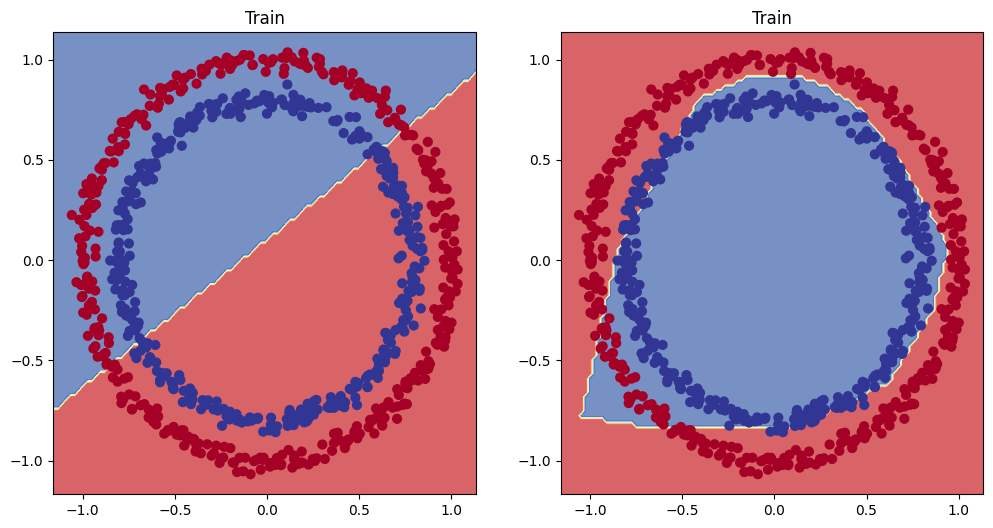

In [ ]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train) # model_1 = no non-linearity

plt.subplot(1, 2, 2)
plt.title("Train")
plot_decision_boundary(model_3, X_train, y_train) # model_3 =has non-linearity

# plt.subplot(1, 3, 3)
# plt.title("Test")
# plot_decision_boundary(model_3, X_test, y_test) # model_3 = has non-linearity


#7. Replicating non-linear activation functions
We saw before how adding non-linear activation functions to our model can help it to model non-linear data.

In [ ]:
start = -10
end = 10
step = 1
a = torch.arange(start=start, end=end, step=1, dtype=torch.float32)
print(a)
a.dtype

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])


torch.float32

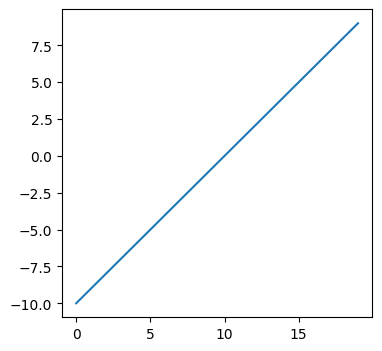

In [ ]:
plt.figure(figsize=(4,4))
plt.plot(a) #raw data indicates linear line

In [ ]:
#checkig with relu activation function
def relu(x):
  return torch.maximum(torch.tensor(0), x)

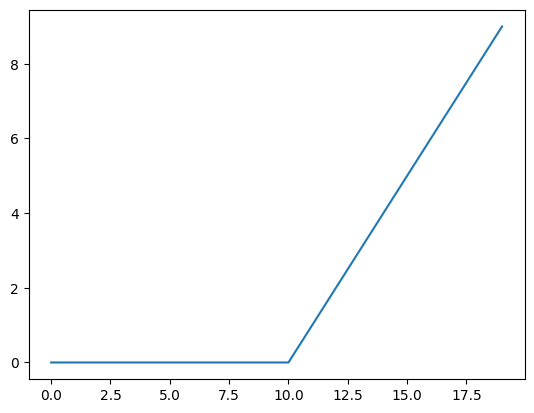

In [ ]:
plt.plot(relu(a))

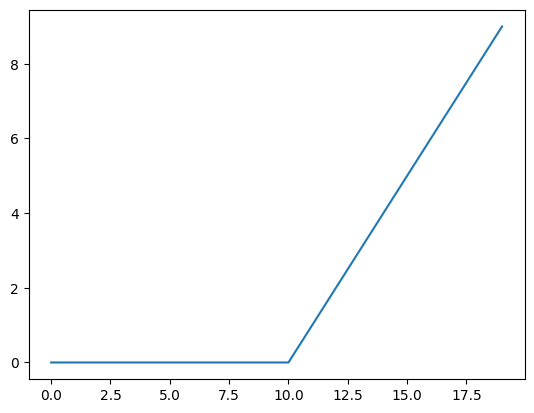

In [ ]:
plt.plot(torch.relu(a))

In [ ]:
#now cheking with sigmoid
def sigmoid(x):
  return 1/(1+torch.exp(-x))

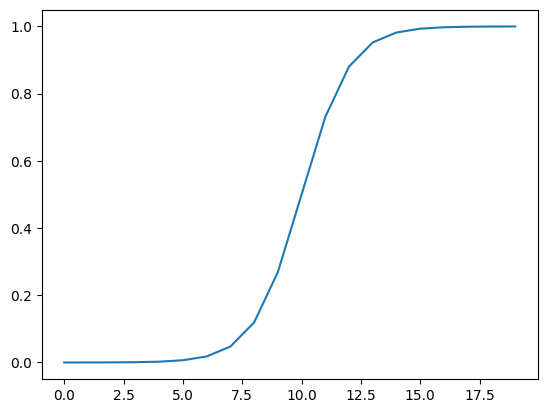

In [ ]:
plt.plot(sigmoid(a))

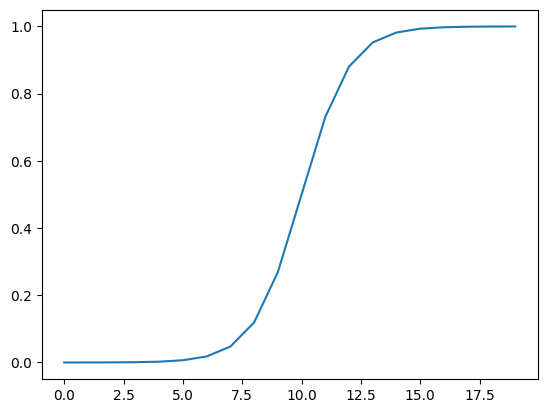

In [ ]:
plt.plot(torch.sigmoid(a))

###8.1 Creating multi-class classification data

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
# give the clusters a little shake up (try changing this to 1.0, the default)
X_blob, y_blob = make_blobs(n_samples=1000, n_features=2, centers=4, cluster_std=2.0, random_state=42) #centers = no. of classes
X_blob.shape, y_blob.shape

((1000, 2), (1000,))

In [ ]:
X_blob[:5,:], y_blob[:5]

(array([[-8.27175201,  6.80571297],
        [-5.39543645, -6.28152443],
        [-5.76297337, -6.72809881],
        [ 3.72115704,  0.27348095],
        [ 4.12069613, -1.03311622]]),
 array([3, 2, 2, 1, 1]))

In [ ]:
type(X_blob), type(y_blob)

(numpy.ndarray, numpy.ndarray)

In [ ]:
X_blob = torch.from_numpy(X_blob).type(torch.float32)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)
print(X_blob.dtype, y_blob.dtype)
type(X_blob), type(y_blob)

torch.float32 torch.int64


(torch.Tensor, torch.Tensor)

In [ ]:
X_blob_train,  X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob, y_blob, test_size=0.2)
print(X_blob_train.shape, X_blob_test.shape)
print(y_blob_train.shape, y_blob_test.shape)

torch.Size([800, 2]) torch.Size([200, 2])
torch.Size([800]) torch.Size([200])


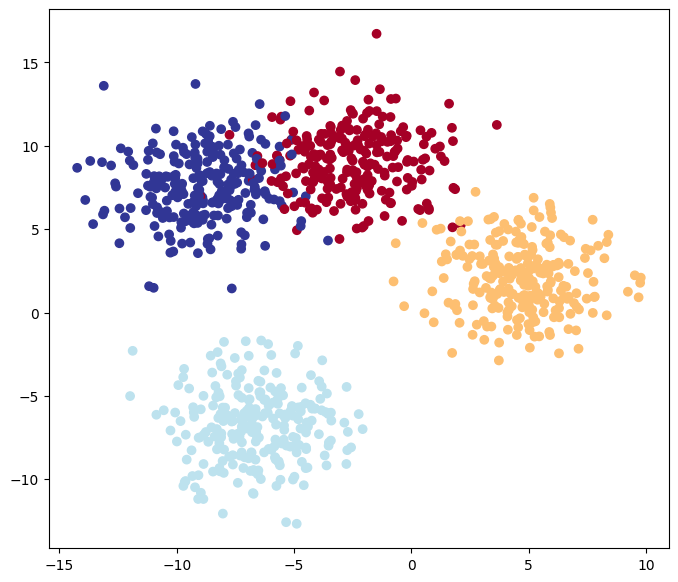

In [ ]:

plt.figure(figsize=(10,7))
plt.scatter(x = X_blob[:,0], y = X_blob[:,1], c=y_blob, cmap=plt.cm.RdYlBu)


### 8.2 Building a multi-class classification model in PyTorch

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [ ]:
import torch
from torch import nn

class Blob_model(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8):
      super().__init__()
      self.linear_layer_stack = nn.Sequential(
          nn.Linear(in_features=input_features, out_features=hidden_units),
          nn.Linear(in_features=hidden_units, out_features=hidden_units),
          nn.Linear(in_features=hidden_units, out_features=output_features),
          )

  def forward(self, x):
        return self.linear_layer_stack(x)

model4 = Blob_model(input_features= 2,
                    output_features=4,
                    hidden_units=8).to(device)


model4


Blob_model(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)

### 8.3 Creating a loss function and optimizer for a multi-class PyTorch model

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model4.parameters(), lr=0.1)

### 8.4 Getting prediction probabilities for a multi-class PyTorch model

In [ ]:
# Perform a single forward pass on the data (we'll need to put it to the target device for it to work)
model4(X_blob_train.to(device))[:5]

tensor([[-0.4210,  0.2022, -0.2740, -0.4431],
        [-1.0257, -1.5846, -1.1663,  1.3696],
        [-0.2414,  0.4512,  0.2573,  0.1584],
        [-1.0221, -1.5592, -1.1750,  1.2989],
        [-0.6000, -0.3382, -0.5271,  0.1404]], device='cuda:0',
       grad_fn=<SliceBackward0>)

In [ ]:
# How many elements in a single prediction sample?
model4(X_blob_train.to(device))[0].shape   #here 4 elements for single prediction because our classes 4

torch.Size([4])

In [ ]:
y_logits = model4(X_blob_test.to(device))[:5]

y_pred_probs = torch.softmax(y_logits, dim=1)
print(y_logits)
print(y_pred_probs)

tensor([[-1.1127, -1.8187, -1.3165,  1.5372],
        [-1.1747, -2.1818, -1.2377,  2.4516],
        [-0.5623, -0.2409, -0.4584,  0.0837],
        [-0.5626, -0.5271, -0.1890,  1.2397],
        [-0.2776,  0.2927,  0.2525,  0.4755]], device='cuda:0',
       grad_fn=<SliceBackward0>)
tensor([[0.0607, 0.0300, 0.0495, 0.8597],
        [0.0251, 0.0092, 0.0235, 0.9422],
        [0.1853, 0.2556, 0.2056, 0.3536],
        [0.1047, 0.1085, 0.1521, 0.6348],
        [0.1517, 0.2683, 0.2578, 0.3222]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>)


In [ ]:
torch.sum(y_pred_probs[4])

tensor(1.0000, device='cuda:0', grad_fn=<SumBackward0>)

In [ ]:
# Which class does the model think is *most* likely at the index 0 sample?
print(y_pred_probs[0])
print(torch.argmax(y_pred_probs[0]))

tensor([0.0607, 0.0300, 0.0495, 0.8597], device='cuda:0',
       grad_fn=<SelectBackward0>)
tensor(3, device='cuda:0')


### 8.5 Creating a training and testing loop for a multi-class PyTorch model

In [ ]:
# Fit the model
torch.manual_seed(42)

# Set number of epochs
epochs = 100

# Put data to target device
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

for epoch in range(epochs):
    ### Training
    model4.train()

    # 1. Forward pass
    y_logits = model4(X_blob_train) # model outputs raw logits
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # go from logits -> prediction probabilities -> prediction labels
    # print(y_logits)
    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_blob_train)
    acc = accuracy_fn(y_true=y_blob_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model4.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = model4(X_blob_test)
      test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
      # 2. Calculate test loss and accuracy
      test_loss = loss_fn(test_logits, y_blob_test)
      test_acc = accuracy_fn(y_true=y_blob_test,
                             y_pred=test_pred)

    # Print out what's happening
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 1.28170, Acc: 45.38% | Test Loss: 0.79740, Test Acc: 75.50%
Epoch: 10 | Loss: 0.26259, Acc: 90.00% | Test Loss: 0.23206, Test Acc: 95.50%
Epoch: 20 | Loss: 0.15623, Acc: 95.25% | Test Loss: 0.15244, Test Acc: 96.00%
Epoch: 30 | Loss: 0.12636, Acc: 95.38% | Test Loss: 0.12937, Test Acc: 96.00%
Epoch: 40 | Loss: 0.11411, Acc: 95.38% | Test Loss: 0.11833, Test Acc: 96.00%
Epoch: 50 | Loss: 0.10744, Acc: 95.38% | Test Loss: 0.11218, Test Acc: 96.00%
Epoch: 60 | Loss: 0.10335, Acc: 95.38% | Test Loss: 0.10846, Test Acc: 96.00%
Epoch: 70 | Loss: 0.10061, Acc: 95.38% | Test Loss: 0.10600, Test Acc: 96.00%
Epoch: 80 | Loss: 0.09865, Acc: 95.38% | Test Loss: 0.10427, Test Acc: 96.00%
Epoch: 90 | Loss: 0.09716, Acc: 95.38% | Test Loss: 0.10297, Test Acc: 96.00%


### 8.6 Making and evaluating predictions with a PyTorch multi-class model

In [ ]:
# Make predictions
model4.eval()
with torch.inference_mode():
    y_logits = model4(X_blob_test)

# View the first 10 predictions
y_logits[:10]

tensor([[  6.8042,  -1.0824,  -9.6583,   1.8526],
        [  0.4522, -16.9524,   2.6469,  10.1577],
        [  3.2155,   5.8770,  -6.4334,  -2.8620],
        [ -7.1776, -17.3389,  13.0564,   9.1020],
        [ -8.9300, -13.5000,  14.5280,   6.5395],
        [  2.2480, -19.2019,   0.7446,  11.7886],
        [  6.5888,  -7.2863,  -7.9150,   5.4809],
        [  5.3594,   7.7791,  -9.7782,  -3.6247],
        [-10.4445, -14.0997,  16.7168,   6.6388],
        [  4.4722,  17.5732, -10.8706,  -9.5592]], device='cuda:0')

In [ ]:
# Turn predicted logits in prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)

# Turn prediction probabilities into prediction labels
y_preds = y_pred_probs.argmax(dim=1)

# Compare first 10 model preds and test labels
print(f"Predictions: {y_preds[:10]}\nLabels: {y_blob_test[:10]}")
print(f"Test accuracy: {accuracy_fn(y_true=y_blob_test, y_pred=y_preds)}%")

Predictions: tensor([0, 3, 1, 2, 2, 3, 0, 1, 2, 1], device='cuda:0')
Labels: tensor([0, 3, 1, 2, 2, 3, 3, 1, 2, 1], device='cuda:0')
Test accuracy: 96.0%


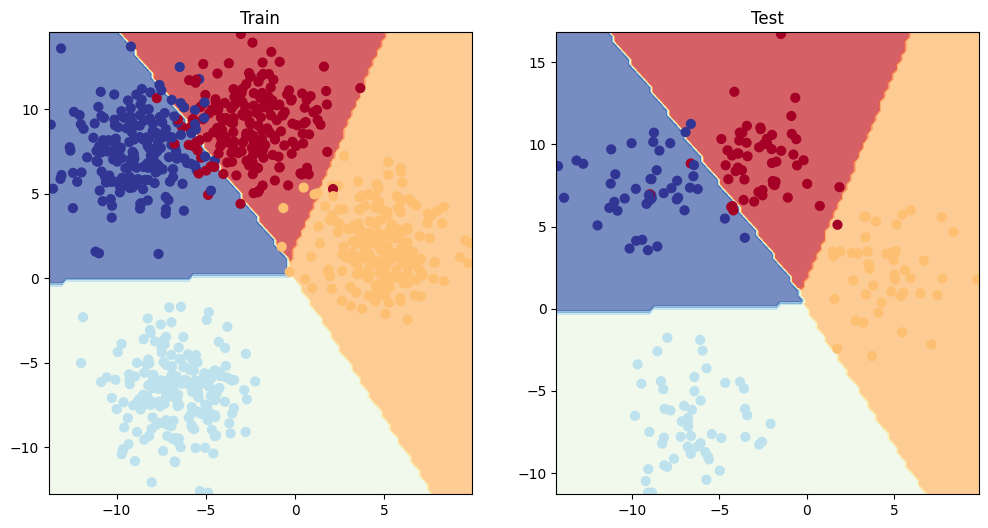

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model4, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model4, X_blob_test, y_blob_test)